# Linear Regression and Regularization

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler

import sklearn
%matplotlib inline

import ipywidgets as widgets
from tqdm.notebook import tqdm

import warnings
# silence future deprecation warnings
warnings.filterwarnings('ignore')

## Prepare the data

Although linear regression is a linear machine learning method, you can have nonlinear dependencies if you transform some of the independent variables by a nonlinear function. By doing this, you can improve the fit of your method. Let us demonstrate this on a house price dataset from [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). Note that this dataset is not identical with one you used in the linear regression exercise, since the this dataset is too small and would cause unreliable evaluation results.

In [2]:
df_house = pd.read_csv("kc_house_data.csv")
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We would like to have a simple linear regression problem with only one independent variable. Thus, we only keep *price* and *sqft_living*.

In [3]:
df_house = df_house[["price","sqft_living"]]
df_house.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


### Split the data

We split the data into a training and test set

In [5]:
train_house, test_house = train_test_split(df_house, test_size=0.5, random_state=42)

### Normalize the data
Let us normalize the data by using *min-max normalization*

In [6]:
scaler = MinMaxScaler()

train_house = pd.DataFrame(scaler.fit_transform(train_house), columns=train_house.columns, index=train_house.index)
test_house = pd.DataFrame(scaler.transform(test_house), columns=test_house.columns, index=test_house.index)

train_house.head()

,price,sqft_living
493,0.117092,0.263499
4253,0.151895,0.269978
18621,0.095222,0.223542
1463,0.082309,0.063715
12026,0.090590,0.184665


In [7]:
X_train_house = train_house[["sqft_living"]]
y_train_house = train_house[["price"]]

X_test_house = test_house[["sqft_living"]]
y_test_house = test_house[["price"]]

## Bias term
To account for the bias term, we add a column containing only ones.

In [8]:
X_train_house["bias"] = 1
X_test_house["bias"] = 1

# Force order
X_train_house = X_train_house[["bias", "sqft_living"]]
X_test_house = X_test_house[["bias", "sqft_living"]]

X_train_house.head()

,bias,sqft_living
493,1,0.263499
4253,1,0.269978
18621,1,0.223542
1463,1,0.063715
12026,1,0.184665


## Fit a linear regression model
Define a linear regression function to estimate the parameters $\theta$ based on the normal equation:
  
  $\Theta:=(X^{\top}X)^{-1}(X^{\top}y)$

In [ ]:
def fit(X, y):
    # START YOUR CODE
    
    # END YOUR CODE
    return thetas

In [9]:
def fit(X, y):
    thetas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return thetas

Run the following code to check your implementation:

In [10]:
thetas = fit(X_train_house, y_train_house)

expected_thetas = np.array([[7.39560812e-05], [4.94185750e-01]])
np.testing.assert_array_almost_equal(thetas, expected_thetas, decimal=4)

## Predict prices
Using $X$ and the estimated $\theta$, predict the house prices on the training data

In [ ]:
def predict(X, thetas):
    # START YOUR CODE
    
    # END YOUR CODE
    return y_pred

In [11]:
def predict(X, thetas):
    y_pred = np.dot(X, thetas)
    return y_pred

          price  sqft_living
0      221900.0         1180
1      538000.0         2570
2      180000.0          770
3      604000.0         1960
4      510000.0         1680
...         ...          ...
21608  360000.0         1530
21609  400000.0         2310
21610  402101.0         1020
21611  400000.0         1600
21612  325000.0         1020

[21613 rows x 2 columns]


<AxesSubplot:xlabel='price', ylabel='sqft_living'>

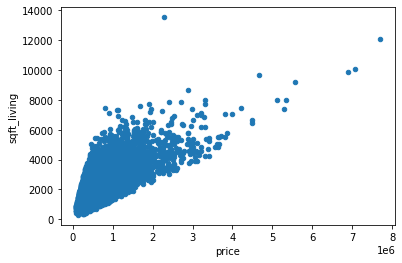

In [19]:
y_pred_house = predict(X_train_house, thetas)
y_pred_house
test = df_house[['price','sqft_living']]
print(test)
test.plot.scatter('price','sqft_living')

## Visualize predictions
Let us plot house prices and predicted house prices

In [20]:
def plot_regression_line(X, thetas, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    deg = len(thetas)-1
    poly = PolynomialFeatures(deg)
    
    xs = np.arange(X.min(), X.max()+0.1, 0.01).reshape(-1,1)
    x = poly.fit_transform(xs)
    y_pred = np.dot(x, thetas)
    
    ax.plot(xs, y_pred, color="r")

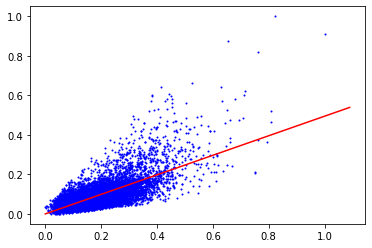

In [21]:
fig, ax = plt.subplots()
ax.plot(X_train_house["sqft_living"].values, y_train_house.values, "bo", markersize=1)
plot_regression_line(X_train_house["sqft_living"].values, thetas, ax)

## Calculate model performance
Now let's check how good our model performs by calculating the $R^2$ score on the test set.

In [ ]:
# r2 = ...

In [ ]:
y_pred_test_house = predict(X_test_house, thetas)
r2_house = r2_score(y_test_house, y_pred_test_house)
print("R2: ", r2_house)

## Adding polynomial features

We aim to improve the fit by adding $x^2$ as additional independent variable.

In [ ]:
X_train_deg2 = X_train_house.copy()
X_train_deg2["sqft_living^2"] = X_train_deg2["sqft_living"] * X_train_deg2["sqft_living"]

X_test_deg2 = X_test_house.copy()
X_test_deg2["sqft_living^2"] = X_test_deg2["sqft_living"] * X_test_deg2["sqft_living"]
X_test_deg2.head()

### Fit the model with the additonal features

In [ ]:
thetas_deg2 = fit(X_train_deg2, y_train_house)

### Calculate the performance

In [ ]:
# r2 = 

In [ ]:
y_pred_test_deg2 = predict(X_test_deg2, thetas_deg2)
r2_deg2 = r2_score(y_test_house, y_pred_test_deg2)
print("R2: ", r2_deg2)

As we can see, by adding $x^2$ as additional independent variable we could slightly improve our performance.

Let's try if we can further improve our performance by adding more polynomial features. To generate our polynomial features we will use the Scikit-Learn function [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). 

In [ ]:
@widgets.interact(poly_deg =(1,18,1))
def f(poly_deg=1):
    poly = PolynomialFeatures(poly_deg)
    X_train_deg = poly.fit_transform(X_train_house["sqft_living"].values.reshape(-1,1))
    X_test_deg = poly.fit_transform(X_test_house["sqft_living"].values.reshape(-1,1))

    thetas_deg = fit(X_train_deg, y_train_house)
    
    y_pred_test = predict(X_test_deg, thetas_deg)
    y_pred_train = predict(X_train_deg, thetas_deg)
    
    r2_test = r2_score(y_test_house, y_pred_test)
    r2_train = r2_score(y_train_house, y_pred_train)
    print("R2 Train {0:.5f}".format(r2_train))
    print("R2 Test {0:.5f}".format(r2_test))
    
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20,10))
    ax0.set_title("Training data - polynomial degree {}".format(poly_deg))
    ax0.plot(X_train_house["sqft_living"], y_train_house["price"], "bo", markersize=1)
    plot_regression_line(X_train_deg, thetas_deg, ax0)
    
    ax1.set_title("Test data - polynomial degree {}".format(poly_deg))
    ax1.plot(X_test_house["sqft_living"], y_test_house["price"], "bo", markersize=1)
    plot_regression_line(X_test_deg, thetas_deg, ax1)

What do you recognize when you increase the polynomial degree?

> Answer the question on ILIAS

## Regularization

The effect of overfitting can be reduced by regularization. Implement the regularized version of linear regression: $\Theta:=(X^{\top}X+\lambda \begin{bmatrix}
    0  & 0 &\ldots&0 \\
    0 & 1 & \\
    \ldots & & \ddots & \\
    0& & & 1
  \end{bmatrix} )^{-1}(X^{\top}y)$

In [ ]:
def fit_reg(X, y, lam):
    # START YOUR CODE

    # END YOUR CODE
    return thetas

In [ ]:
def fit_reg(X, y, lam):
    Xt = np.transpose(X)
    XtX = np.dot(Xt,X)
    I = np.identity(XtX.shape[0])
    I[0,0] = 0
    XtX = XtX + (lam * I)
    XtXm1 = np.linalg.inv(XtX)
    Xty = np.dot(Xt,y)
    thetas = np.dot(XtXm1,Xty)
    return thetas

You can check your implementation by executing the following cell:

In [ ]:
expected_thetas = np.array([[0.00178927], [0.48482755]])
actual_thetas = fit_reg(X_train_house, y_train_house, lam=2)

np.testing.assert_array_almost_equal(expected_thetas, actual_thetas)

We  plot the graph using the regularized parameter vectors. As you can see, the effect of overfitting is strongly reduced.

In [ ]:
@widgets.interact(poly_deg = (0,12,1), lam=(0,100,1))
def f(poly_deg=1, lam=4):
    poly = PolynomialFeatures(poly_deg)
    X_train_deg = poly.fit_transform(X_train_house["sqft_living"].values.reshape(-1,1))
    X_test_deg = poly.fit_transform(X_test["sqft_living"].values.reshape(-1,1))

    thetas_deg = fit_reg(X_train_deg, y_train, lam=lam)
    
    y_pred_test = predict(X_test_deg, thetas_deg)
    y_pred_train = predict(X_train_deg, thetas_deg)
    
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    print("R2 Train", r2_train)
    print("R2 Test", r2_test)
    
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20,10))
    ax0.set_title("Training data - polynomial degree {}".format(poly_deg))
    ax0.plot(X_train_house["sqft_living"], y_train_house["price"], "bo", markersize=1)
    plot_regression_line(X_train_deg, thetas_deg, ax0)
    
    ax0.set_title("Test data - polynomial degree {}".format(poly_deg))
    ax1.plot(X_test_house["sqft_living"], y_test_house["price"], "bo", markersize=1)
    plot_regression_line(X_test_deg, thetas_deg, ax1)

Find the best configuration of **polynomial degree** and $\lambda$

<font color='red'>PLEASE REPLACE TEXT WITH YOUR CONFIGURATION</font>

## Regularization to help with numerical issues

Another benefit of regularization is that it can help in case of numerical issues. Let us consider our original dataset.

In [ ]:
df_house_2 = pd.read_csv("kc_house_data.csv")
df_house_2 = df_house_2[["price","sqft_living","bedrooms"]]
df_house_2.head()

In [ ]:
train_house_2, test_house_2 = train_test_split(df_house_2, test_size=0.5, random_state=42)

In [ ]:
scaler = MinMaxScaler()

train_house_2 = pd.DataFrame(scaler.fit_transform(train_house_2), columns=train_house_2.columns, index=train_house_2.index)
test_house_2 = pd.DataFrame(scaler.fit_transform(test_house_2), columns=test_house_2.columns, index=test_house_2.index)

test_house_2.head()

To make the feature matrix $X^{\top}X$ singular, we just add  another independent variable (Size2) to X
that amounts to just twice the Size.

In [ ]:
train_house_2["sqft_living2"] = 2 * train_house_2["sqft_living"]
train_house_2["bias"] = 1

test_house_2["sqft_living2"]= 2 * test_house_2["sqft_living"]
test_house_2["bias"] = 1

test_house_2.head()

In [ ]:
X_train_house_2 = train_house_2[["bias", "sqft_living", "bedrooms", "sqft_living2"]]
y_train_house_2 = train_house_2[["price"]]

X_test_house_2 = test_house_2[["bias", "sqft_living", "bedrooms", "sqft_living2"]]
y_test_house_2 = test_house_2[["price"]]

We see that the linear regression fails, since $X^{\top}X$ is not invertible.

In [ ]:
thetas = fit(X_train_house_2, y_train_house_2)

There are two possiblities to tackle this issue, the first one is to use the pseudoinverse instead of the inverse
and the second one is using regularization. 

> Try out both. 

*Hint*: For conducting linear regression with the pseudoinverse, you have to slightly modify the linear_regression method given further above. 
The numpy function [np.linalg.pinv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html) becomes handy for this.

In [ ]:
def fit_pseudoinverse(X,y):
    # START YOUR CODE
    
    # END YOUR CODE
    return thetas

In [ ]:
def fit_pseudoinverse(X, y):
    thetas = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return thetas

Run this code to check your implementation

In [ ]:
thetas_pseudo_inverse = fit_pseudoinverse(X_train_house_2, y_train_house_2)
print ("thetas obtained by linear regression with pseudoinverse:\n", thetas_pseudo_inverse)

expected_thetas_pseudo_inverse = np.array([
    [ 0.02902459],
    [ 0.11220321],
    [-0.12253607],
    [ 0.22440641]])

np.testing.assert_array_almost_equal(thetas_pseudo_inverse, expected_thetas_pseudo_inverse, decimal=5)

In [ ]:
thetas_regularization = fit_reg(X_train_house_2, y_train_house_2, lam=1)
print ("thetas obtained by linear regression with regularization:\n", thetas_regularization)

expected_thetas_regularization = np.array([
    [ 0.02846346],
    [ 0.11163748],
    [-0.11932519],
    [ 0.22327497]])

np.testing.assert_array_almost_equal(thetas_regularization, expected_thetas_regularization, decimal=5)

## Assignment
> Now finish the ILIAS quiz to **Linear Regression and Regularization**.